# Introduction to Predictive Analysis: complete workflow using  Linear Regression

This notebook will introduce you to the whole predictive analysis workflow, starting from problem definition to making prediction models. Many steps are involved in this process, and we´ll explore them through a practical example. 

By the end of this tutorial you should fully appreciate the importance of each step, with particular **emphasis on the preparatory work** that needs to be done **before** thinking about any form of advanced analysis or machine learning. In fact, our focus is on preparatory exploration of data, using the simplest form of machine learning (linear regression) to complete the whole analysis workflow. 

In future lectures, you´ll get the chance to explore other machine learning algorithms. However, machine learning in its advanced forms goes beyond our scope, and will be covered elsewhere in your university degree. 

>Upon completion of this tutorial one should be able to:
>* define the **problem** at hand;
>* appreciate the importance of data **exploration**, through a number of methods and tools (e.g. study **feature correlations**);
>* appreciate **data preparation** and **curation** (adding/removing/aggregating features, creating numerical features, handling missing data);
>* perform **feature analysis**, to identify the most influential features;
>* get on with the **machine learning** process: 
    * **partitioning** the data in **training** and **testing** sets;
    * **train** the testing set, using **linear regression** to build a **regression model**;
    * **test** the regression model, using the testing set;
    * use some metrics for **evaluating the performance of the prediction model** at hand;


# The Predictive Analysis Work Flow
![PA Work Flow](./images/Predictive_Analysis_Flow1.png)



# Step 1: Defining the problem
![PA Work Flow2](./images/Predictive_Analysis_Flow2.png)

## Real World Applications have domain-specific problems
**We'll use a real-world dataset as a reference example**<br>
**file_path = './data/admissions.csv'**<br><br>

### Defining the admissions prediction problem, using a historical dataset

Applying for graduate school can be a pretty stressful time. Even though acceptances are often subjective and depend upon the pool of applicants, **what if there was a way to predict the probability of getting accepted?** Is there a way to establish **which factors (in your application) will have the most impact on the outcomes?**

**This tutorial will help elucidate means for doing just that.**

### You'll find many similar problems from different domains
- A chief financial officer, using marketing costs to predict sales revenue.
- A doctor wanting to know the probability of diagnosis based on symptoms.
- Lecturers wanting to know how much study time is required for students to ace an exam.
- A house buyer, who wants to establish how the house size and number of rooms will affect the price the house would sale for.

...many more examples.

# Step 2: Exploring the dataset
### Understanding which information we have available in the dataset
![PA Work Flow3](./images/Predictive_Analysis_Flow3.png)

## Some Basic Exploratory Analysis Tools
Before diving into creating any model, it is best to **understand the nature and characteristics of the data** being analyzed. We have in fact seen how `Pandas` may be used to import datasets and perform some exploratory analysis. We can detect patterns, check the data structure, plot simple statistics on the features (the columns).

>**Check out the notebooks distributed earlier, for extensive examples on Pandas.**

In [1]:
# Let's import our dataset
import pandas as pd
file_path = './data/admissions.csv'
df = pd.read_csv(file_path, header=0)

# Print out the first five entries of the dataset
# observe the features (columns), typical values (range), data types, etc.
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [2]:
# extract simple statistics for each feature
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


## Initial considerations about the Graduate Admissions Dataset
The Graduate Admissioins Dataset contains 8 features for 500 applicants, and was obtained from Kaggle. The dataset features are associated with the requirements for getting admission into a graduate school program. But **not all features have the same influece** onto the likelihood of being accepted. <br>
Looking at this **historical data**, we'll study the relative importance of the different features, and then build a **regression model** on those features, which will help us **predicting the chances of admittance**, based on our own credentials!

###  The Dataset Structure
A data frame is a convenient object for structuring data in tables similar to excel.  Using the `df.head()` command returns the first five entries in the dataset. The `head` command has an optional input argument `n` to see the first $n$ entries.

**Let's view the first ten entries of the DataFrame using `df.head(n=10)`**

In [3]:
df.head(n=10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


Conversely, `df.tail()` shows the last five. The `tail` command also accepts the optional input argument `n`,to show the last $n$ entries. So the last 10 entries of the dataset is:

In [4]:
# Print out the last ten entries of the dataset
df.tail(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
490,491,307,105,2,2.5,4.5,8.12,1,0.67
491,492,297,99,4,3.0,3.5,7.81,0,0.54
492,493,298,101,4,2.5,4.5,7.69,1,0.53
493,494,300,95,2,3.0,1.5,8.22,1,0.62
494,495,301,99,3,2.5,2.0,8.45,1,0.68
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


### Dataset Manipulation: normalizing CGPA scores onto a 4-point scale
Using `head` and `tail` we see that this dataset contains the column `CGPA`. This is a 10 point grading scale used commonly in foreign countries, so we want to add a column that transforms the 10 point scale into a *4* point scale, because you may want to predict your chances of admittance using a the GPA scale.

#### Adding a New Column
To add a new column to our DataFrame object we can use the `df.insert` module to create a new column, and place it directly next to the CGPA column, for convenient comparison.

In [5]:
# GPA (scores 0-4) is a normalized version of CGPA (scores between 0 and 10)
# Create the new column "GPA", which equals 4*"CGPA"/10, and place it after the 6th column
df.insert(6,'GPA', 4*df['CGPA']/10)

# Let's always check that our changes have worked out ok.
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,GPA,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,3.860,9.65,1,0.92
1,2,324,107,4,4.0,4.5,3.548,8.87,1,0.76
2,3,316,104,3,3.0,3.5,3.200,8.00,1,0.72
3,4,322,110,3,3.5,2.5,3.468,8.67,1,0.80
4,5,314,103,2,2.0,3.0,3.284,8.21,0,0.65


### Statistical measures
`df.describe()` provides more statistical information about each feature, such as the mean, max, min, standard deviation, and quantile information.

In [6]:
# Show more statistical metrics of each feature using df.describe()
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,GPA,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,3.430576,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.241925,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,2.720000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,3.251000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,3.424000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,3.616000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,3.968000,9.920000,1.000000,0.97000


### Exploring the Dataset: Features Correlations
**Plotting features against one another** can help visualize if there is a **dependancy" between pairs of features** or, statistically speaking, if two features are correlated.

We should **expect CGPA to be strongly correlated to GPA**, since CGPA is just a re-normalized version of GPA.

In fact, look at the plot...

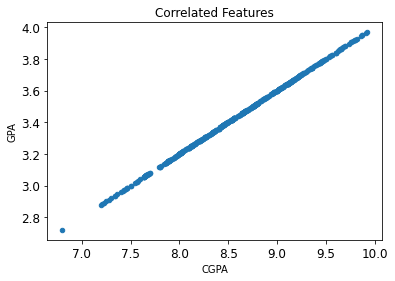

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
df.plot(x='CGPA', y='GPA', 
        kind='scatter',title='Correlated Features',fontsize=12)
plt.show()

#### Let's pick two features that are somewhat less correlated, but still somewhat correlated
The figure above shows two features that are directly correlated, CGPA and GPA.  To put it simply correlation implies that two feature follow similar trends, i.e. as CGPA increases, GPA increases. In all fairness, GPA was calculated using CGPA, so they should be correlated.  However, two features from the dataset whose correlation may not be so obvious is the applicant's GRE score and their GPA. In the plot below the features still show **similar trends**, but they're **less correlated** than the previous two features.

>**What are these features about?**<br>
>* **GPA** (Grade Point Average): when you are enrolled in a US university the GPA indicates how well you scored in your courses on average;
>* **GRE** general test score: an admissions test for graduate and professional school. It tests: 1) verbal reasoning; 2) quantitative reasoning. 3) Analytical Writing.

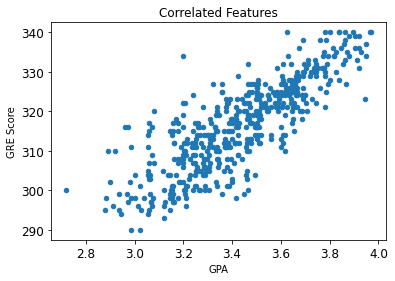

In [8]:
df.plot(x='GPA', y='GRE Score', 
        kind='scatter',title='Correlated Features',fontsize=12)
plt.show()

#### Let´s pick two uncorrelated Features
Uncorrelated features should show no discerning patterns or trends between them. For instance, the score included in the letter of recommendation of the accademic tutor should have little bearing on how well they performed on the TOEFL. In fact, the academic tutor is focussing on academic performance - unless the graduate program has to do with languages.

>**What are these features about?**
>* **TOEFLE**: Test of English as a Foreign Language (foreign language performance)
>* **LOR**: letter of reference (academic performance)

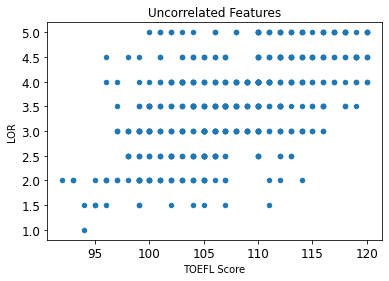

In [9]:
df.plot(x='TOEFL Score', y='LOR',
        kind='scatter',title='Uncorrelated Features',fontsize=12)
plt.show()

**Let's look at the correlation between 'TOEFL Score' and 'GRE Score'.**

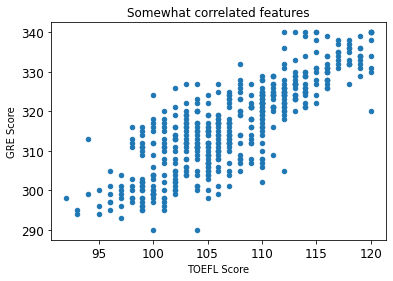

In [10]:
df.plot(x='TOEFL Score' ,y='GRE Score', 
        kind='scatter', title='Somewhat correlated features' , fontsize=12)
plt.show()

### Computing correlations mathematically
Visualizations are a great means of seeing conceptually what something is, as in the case of correlation. But it is good practice to find the correlation mathematically. I suppose you have learned those in the **statistics course?**

>#### SELF-LEARNING EXERCISE
**Find more about mathematical correlations**. Check your statistics book or search online to find out about the different types of correlation and how to use them. Learn different ways to measure **correlation**, **covariance**, **Pearson correlation**, and **Spearman's Correlation**. And also, **how to compute all those correlations in Python using Pandas.**

### Please pay particular attention to the fact that ...
**...correlation does not imply causation**, and therefore, any strong correlation should be thought of critically!!

Look at this figure, which shows number of storks (full squares), birth rate (open circles), and linear regressions (dotted lines), relating to the area of Lower Saxony, Germany (1971–2000).<br>

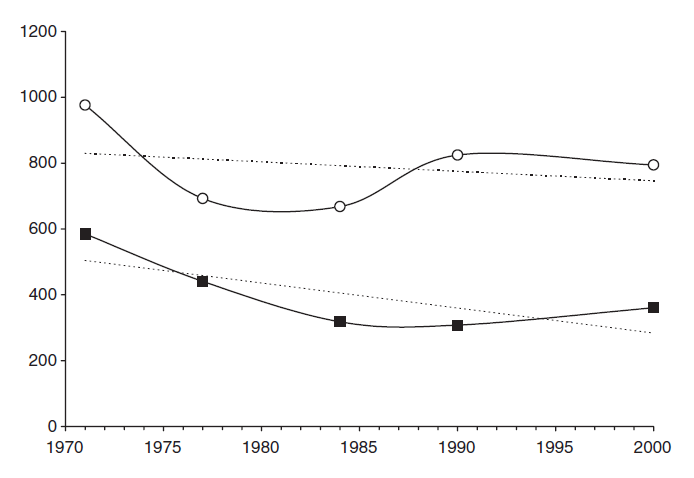
***SOURCE***: 
<a href="http://web.stanford.edu/class/hrp259/2007/regression/storke.pdf">New evidence for the Theory of the Stork</a><br>
*Blackwell Publishing Ltd. Paediatric and Perinatal Epidemiology 2004, 18, 88–92*

This figure shows a correlation between the number of storks and baby birth rates.<br>

>**So, could it be true that babies are delivered by storks?**

## Other preparation steps on the dataset
### Categorical Features
An example categorical feature is the **Research** column. The original categories included two sets: those with research experience and those without.

Just like in this case, we often need to **turn different categories into numeric values** to facilitate subsequent calculations. 

>The curator of this dataset has already taken care of that, **setting binary values** as follows:
>> for candidates with research experience: 1<br> 
>> otherwise: 0

### Missing values
The curator has also already taken care of missing values, but we always have to check for missing data and manage them properly. For instance, we can fill in gaps with the NaN type, or add zeros, or averages, etc.<br>
Our dataset have already been **dummified** (categories turned into numbers) and **cleaned** (no missing values).<br>
So we are ready to proceed with analysis.


# Checkpoint - Exploratory Analysis
We have now accomplished a good part of this step, by loading the dataset and converting it into a `pandas.DataFrame` object. The conversion has enhanced our analysis capabilities. We have checked for feature correlations, computed simple statistics and have added a new feature (a new column).<br>

>But before we get into making predictions, we still need to **better analyse the features.** 

After that, we´ll be ready to select the most representative feature (or features), to make a model (or models) that allows for **predictions** to be made.
We are going to use `sklearn` to easily build **regression** models on different features. 